## introduction into jupyter/python
__a practioner's guide (no theory, little background, just doing)__

### navigation in jupyter

double-click into this cell (this is markdown)

__I can write in bold letter__
### this is a headline

#### now follows an unordered list
* ham
* spam
* eggs

#### and now an ordered list
1. imitate
2. assimilate
3. innovate

and this is just normal text.

use all this to describe, structure and protocol your analysis

jshhhhhhhhhhhh

#### excercise 1 - get familiar with the menu, markdown and code execution
1. insert a new cell below/above this cell
2. make a markdown cell out of the cell below and add a list of items (markdown format) 
3. execute the print statement in a cell

 `print("I will become a good data scientist, I will practice every day, After I wake up I will log into my computer and programm python until my fingers will be chafed.")`
4. clear the output
5. delete the cell
6. make a copy of the notebook
7. rename it
8. save it
9. BONUS: make yourself familiar with keyboard shortcuts (see Help)

### simple python

In [1]:
# import libraries
import math # math functions
import numpy as np
from os import path

In [2]:
# install a new library
!pip install fuzzywuzzy

In [3]:
import fuzzywuzzy as fw

In [4]:
# can be used as a calculator
230 - 220 * 0.5

120.0

In [5]:
# simple boolean statements
230 - 220 * 0.5 == math.factorial(5)

True

In [6]:
# assign a variable
first_name = 'Max'
name = 'Mustermann'

In [7]:
print(first_name, name)

Max Mustermann


In [8]:
# datastructures
mylist = ['ham','eggs','spam']
mydict = {'ham':'Schinken','eggs':'Eier','spam':'Frühstücksfleisch'}

In [9]:
# loop over list
for ele in mylist:
    print(ele)

ham
eggs
spam


In [10]:
# loop over dictionary keys and string formatting
for key in mydict.keys():
    print("{} translates to {}".format(key, mydict[key]))

ham translates to Schinken
eggs translates to Eier
spam translates to Frühstücksfleisch


In [11]:
# a function 
def translate_english_to_german(word):
    mydict = {'ham':'Schinken','eggs':'Eier','spam':'Frühstücksfleisch'}
    return mydict.get(word)

In [12]:
# use function
print(translate_english_to_german('ham'))

Schinken


In [13]:
# if ... then
curword = 'ham'
if curword in mydict:
    print(translate_english_to_german('ham'))
else:
    print('I haven\'t yet learnt the word')

Schinken


#### excercise 2 - play with python
1. make your own dictionary english to your own language (just 5 words)
2. write a translation function
3. apply translation function on word of your dictionary and on word which is not yet part. what is the output for the latter
4. BONUS: iterate over a list of words and translate each word. if word is not part of the dictionary print out that you have not yet learnt the word

### learn a little pandas

In [3]:
import pandas as pd

In [5]:
data = pd.read_excel('../data/wine_taste.xlsx')

In [16]:
#inspect....  move your cursor into the brackets data.head(cursor)  and do shit+TAB+TAB for parameters
data.head()

,Name,Label,Taste,Gender,Personality,eat_in_or_out
0,Peter,red,sweet,male,introvert,in
1,Andreas,white,spicy,male,extrovert,in
2,James,red,sweet,male,extrovert,in
3,Jim,white,spicy,male,introvert,out
4,John,white,spicy,male,extrovert,out


In [17]:
data.tail()

,Name,Label,Taste,Gender,Personality,eat_in_or_out
15,Ortrud,white,sour,female,introvert,out
16,Lilly,white,sweet,female,introvert,in
17,Georgina,rose,hot,male,introvert,out
18,Patricia,white,spicy,female,extrovert,out
19,Xavier,rose,spicy,male,extrovert,in


In [18]:
# describe the data 
data.describe()

,Name,Label,Taste,Gender,Personality,eat_in_or_out
count,20,20,20,20,20,20
unique,20,3,4,2,2,2
top,Patricia,white,sweet,male,extrovert,out
freq,1,9,7,14,11,10


In [19]:
# query the data
data.query('Label == "white"')  # combinations possible

,Name,Label,Taste,Gender,Personality,eat_in_or_out
1,Andreas,white,spicy,male,extrovert,in
3,Jim,white,spicy,male,introvert,out
4,John,white,spicy,male,extrovert,out
5,Daniel,white,hot,male,extrovert,in
10,Ben,white,sweet,male,introvert,out
11,Zac,white,sour,male,introvert,in
15,Ortrud,white,sour,female,introvert,out
16,Lilly,white,sweet,female,introvert,in
18,Patricia,white,spicy,female,extrovert,out


In [20]:
# get specific row as dataframe
data.loc[[3],:]

,Name,Label,Taste,Gender,Personality,eat_in_or_out
3,Jim,white,spicy,male,introvert,out


In [21]:
# get specific rows
data.loc[[3,4,5],:]

,Name,Label,Taste,Gender,Personality,eat_in_or_out
3,Jim,white,spicy,male,introvert,out
4,John,white,spicy,male,extrovert,out
5,Daniel,white,hot,male,extrovert,in


In [22]:
# set index
data = data.set_index('Name')

In [23]:
data.head()

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out


In [24]:
# get row by name
data.loc[['Peter','Andreas','Georgina'],:]

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
Georgina,rose,hot,male,introvert,out


In [25]:
# show select columns
data.loc[['Peter','Andreas','Georgina'],['eat_in_or_out','Personality']]

,eat_in_or_out,Personality
Name,,
Peter,in,introvert
Andreas,in,extrovert
Georgina,out,introvert


In [26]:
# join data from other sheet
jobs = pd.read_excel('data/attributes.xlsx')

In [27]:
jobs.head()

,Name,Job,Size
0,Peter,medical doctor,170
1,Andreas,data scientist,182
2,James,preacher man,190
3,Jim,professor,188
4,John,post office officer,176


In [28]:
# set index to Name
jobs = jobs.set_index('Name')

In [29]:
# now join
joined = data.join(jobs)
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Size
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


In [30]:
# rename a column
joined = joined.rename(columns = {'Size':'Bodysize'})
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Bodysize
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


In [31]:
# write out dataframe as csv
joined.to_csv('data/joined_wine_and_jobs.tab', sep = '\t')

#### excercises 3 - interact with dataframes
1. display what persons are extroverts?
2. how many people prefer eating in restaurants?
3. how many people that like spicy food like red wine?
4. write out the dataframe as a semicolon separated flatfile and an excel file
5. convert dataframe to a dictionary using the dataframe method to dict
6. BONUS: filter for rows where the Index Name starts with an A


### visualization

In [32]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
# count
data.Taste.value_counts()

sweet    7
spicy    5
hot      4
sour     4
Name: Taste, dtype: int64

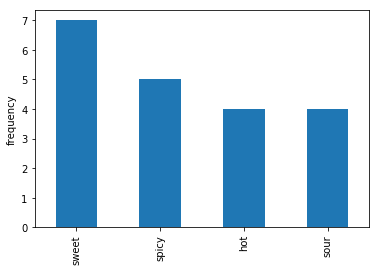

In [34]:
# simple barplot
data.Taste.value_counts().plot.bar()
plt.ylabel('frequency')

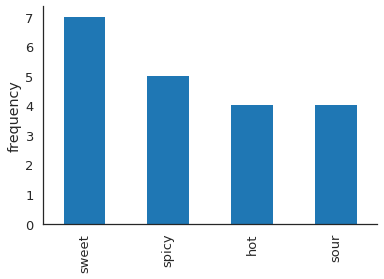

In [35]:
# slightly nicer settings
sns.set_context('talk')
sns.set_style('white')
data.Taste.value_counts().plot.bar()
plt.ylabel('frequency')
sns.despine()

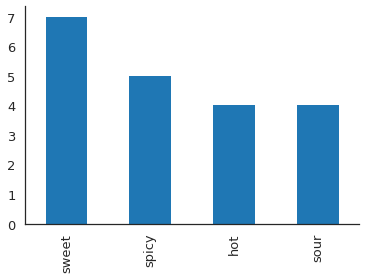

In [36]:
# slightly nicer settings and save the picture
sns.set_context('talk')
sns.set_style('white')
data.Taste.value_counts().plot.bar()
sns.despine()
plt.savefig('taste_frequency_plot.png')

In [37]:
data.head()

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out


In [38]:
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Bodysize
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


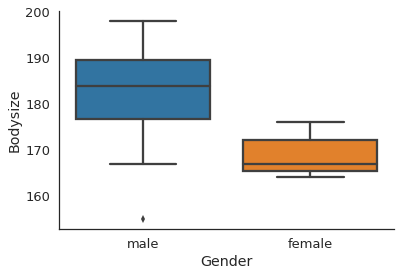

In [39]:
# generate a boxplot
sns.boxplot(data = joined, x= 'Gender', y='Bodysize')
sns.despine()

#### excercises 4 - generate some visualizations
1. generate a barplot for Personality frequencies
2. generate a boxplot for Taste vs Bodysize
3. change the colors of the boxplot
4. generate a histogram/density plot for Bodysize
5. BONUS: Put a swarmplot on top of boxplot

### let's train a model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
test = data.sample(5)
train = data.loc[~data.index.isin(test.index),:]

In [10]:
clf = RandomForestClassifier()

In [11]:
clf.fit(pd.get_dummies(train.drop('Label', axis = 1)),train.Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [48]:
train_data = pd.get_dummies(train.drop('Label', axis = 1))

In [49]:
test_data = pd.get_dummies(test.drop('Label',axis = 1))

In [50]:
test_data = test_data.loc[:,train_data.columns.tolist()].fillna(0)

In [51]:
pred_labels = clf.predict(test_data)

In [53]:
ct = pd.crosstab(test.Label, pred_labels, rownames=['actual'], colnames=['preds'])

In [56]:
ct

preds,red,rose,white
actual,,,
red,2,0,0
white,1,1,1


In [55]:
accuracy_score(test.Label, pred_labels)

0.59999999999999998